In [1]:
import sqlite3
import pandas as pd  # اختیاری برای نمایش بهتر نتیجه
import matplotlib.pyplot as plt

In [12]:
# اتصال به پایگاه داده
conn = sqlite3.connect(r'C:\Users\KIKI\Desktop\connection1\firstconnection_database.db')
conn

In [13]:
query = "SELECT * FROM firstconnection_table;"

# اجرای کوئری و ذخیره نتایج در یک DataFrame
df = pd.read_sql_query(query, conn)

# نمایش داده‌ها
print(df)

        id      agentType  agentCode      name          family nationanalCode  \
0        1  نماينده حقيقي       3759      محمد        عليدوستي       42244846   
1        2  نماينده حقيقي       3883   محمدعلي      پورمنوچهري       68557922   
2        3  نماينده حقيقي       3925      حميد           كفائي       41596331   
3        4  نماينده حقيقي       3967      محسن          مسگرها       41263936   
4        5  نماينده حقيقي       4029  علي اكبر      جمشيدي مهر       42320471   
...    ...            ...        ...       ...             ...            ...   
2695  2744  نماينده حقيقي       9674   احمدرضا            حسني     4529861333   
2696  2745  نماينده حقيقي       9676  محمدجواد  شفائي شهربابكي     3149507960   
2697  2746  نماينده حقيقي       9677      حسين           عباسي     1688856943   
2698  2747  نماينده حقيقي       9679      اصغر           ذاكري     3391418338   
2699  2748  نماينده حقيقي       9681      نغمه           صادقي     4569489419   

     branchCode  branchName

In [3]:
# اجرای کوئری برای مقایسه تعداد نماینده‌های حقیقی و حقوقی
query = '''
SELECT agentType, COUNT(*) as count
FROM firstconnection_table
GROUP BY agentType;
'''
df = pd.read_sql_query(query, conn)
df

,agentType,count
0,نماينده حقوقي,7
1,نماينده حقيقي,2693


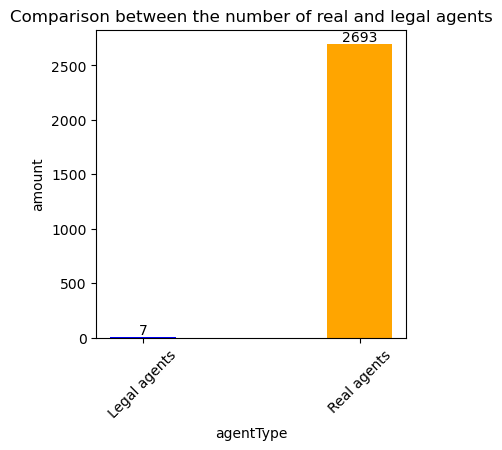

In [4]:

# تغییر نام نوع نماینده‌ها به واژه‌های دلخواه (مثلاً "Real" برای حقیقی و "Legal" برای حقوقی)
df['agentType'] = df['agentType'].replace({'نماينده حقيقي': 'Real agents', 'نماينده حقوقي': 'Legal agents'})
# شمارش تعداد نمایندگان حقوقی و حقیقی
count_agents = df['agentType'].value_counts()
plt.figure(figsize=(4, 4))


bars = plt.bar(df['agentType'], df['count'], color=['blue', 'orange'], width=0.3)
# نوشتن تعداد هر ستون بالای آن
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# رسم نمودار
plt.xlabel('agentType')
plt.ylabel('amount')
plt.title('Comparison between the number of real and legal agents')
plt.xticks(rotation=45)
plt.show()

In [5]:
# کوئری برای بررسی وضعیت نمایندگی های بیمه
query = '''
SELECT status, COUNT(*) as count
FROM firstconnection_table
GROUP BY status;
'''
df = pd.read_sql_query(query, conn)
df

,status,count
0,تعليق,8
1,فعال,2660
2,مرخصي,32


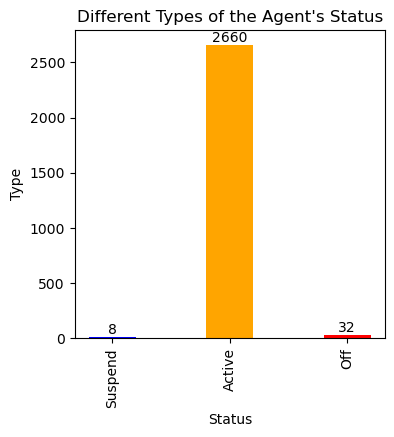

In [6]:

# تغییر نام نوع نماینده‌ها به واژه‌های دلخواه (مثلاً "Real" برای حقیقی و "Legal" برای حقوقی)
df['status'] = df['status'].replace({'فعال': 'Active', 'تعليق': 'Suspend','مرخصي':'Off'})

plt.figure(figsize=(4, 4))


bars = plt.bar(df['status'], df['count'], color=['blue', 'orange','red'], width=0.4)
# نوشتن تعداد هر ستون بالای آن
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# رسم نمودار
plt.xlabel('Status')
plt.ylabel('Type')
plt.title("Different Types of the Agent's Status")
plt.xticks(rotation=90)
plt.show()

In [7]:
# اجرای کوئری برای تعداد نماینده‌های هر استان
query = '''
SELECT province, COUNT(*) as count
FROM firstconnection_table
GROUP BY province;
'''
df_province = pd.read_sql_query(query, conn)
df_province

,province,count
0,آذربايجان شرقي,75
1,آذربايجان غربي,60
2,اردبيل,13
3,اصفهان,164
4,البرز,62
5,ايلام,10
6,بوشهر,12
7,تهران,1400
8,خراسان جنوبي,21
9,خراسان رضوي,175


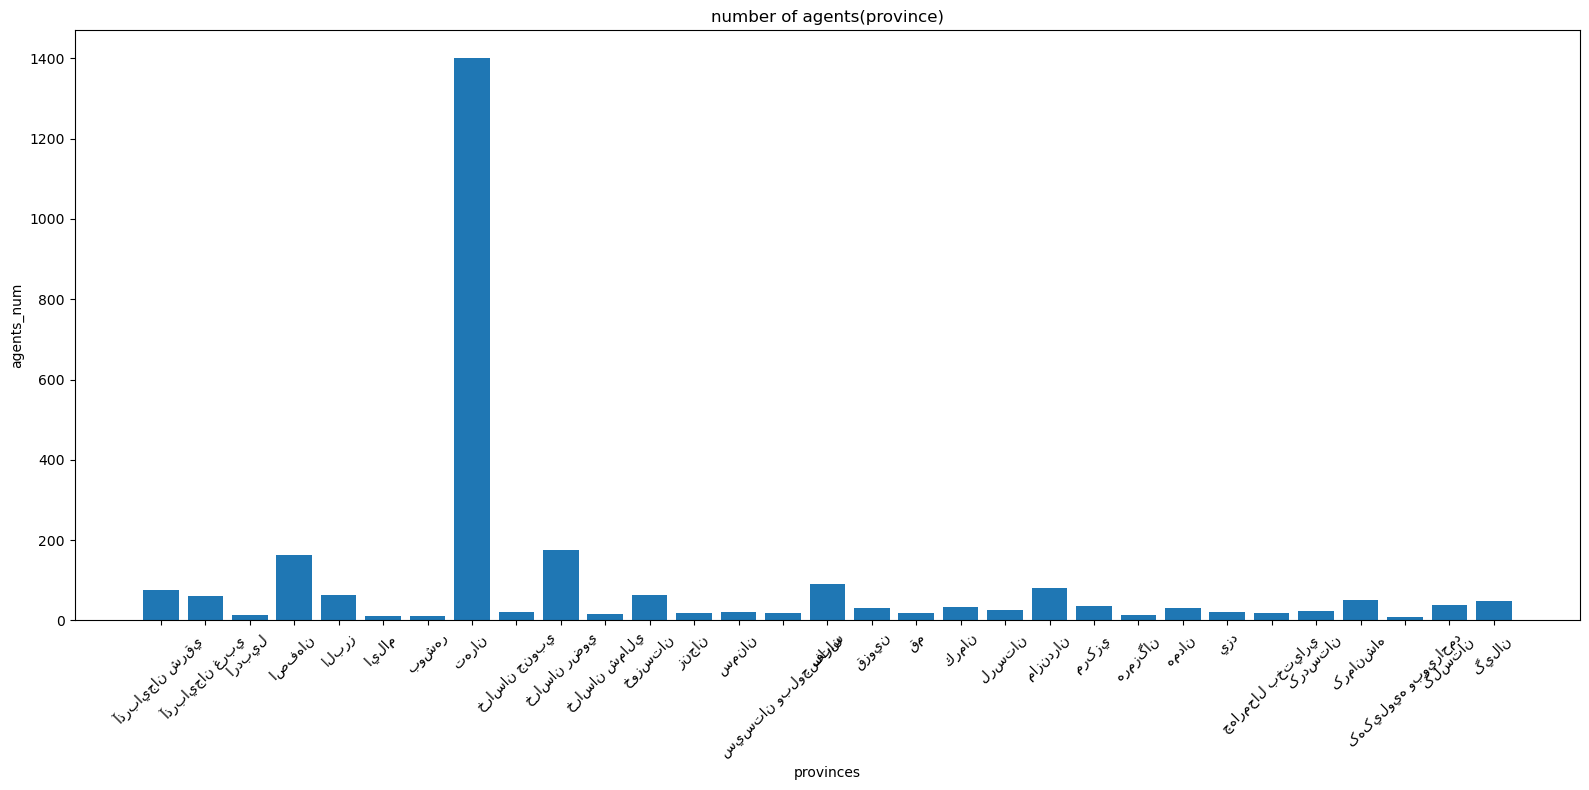

In [8]:
# اجرای کوئری برای تعداد نماینده‌های هر استان
query = '''
SELECT province, COUNT(*) as count
FROM firstconnection_table
GROUP BY province;
'''
df_province = pd.read_sql_query(query, conn)

# رسم نمودار
plt.figure(figsize=(16, 8))
plt.bar(df_province['province'], df_province['count'])
plt.xlabel('provinces')
plt.ylabel('agents_num')
plt.title('number of agents(province)')
plt.xticks(rotation=45)
# بهبود layout برای جلوگیری از هم‌پوشانی
plt.tight_layout()
plt.show()


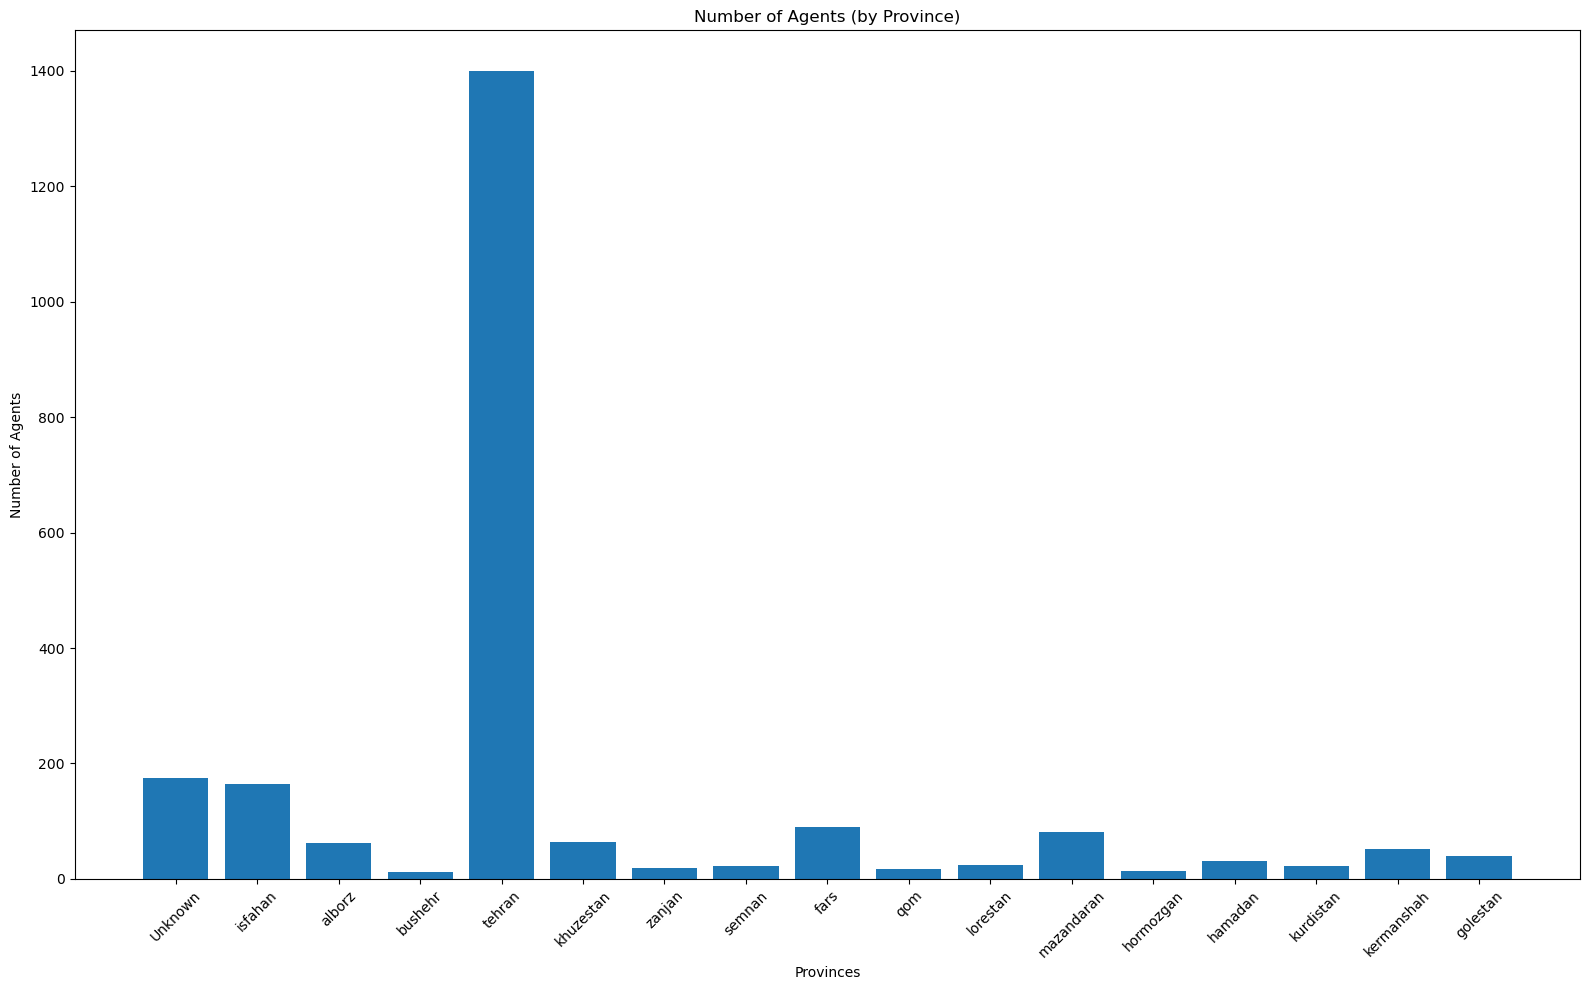

In [9]:
def clean_text(text):
    if isinstance(text, str):
        return text.strip().replace('\u200c', '').replace('\xa0', '').lower()  # حذف نیم‌فاصله و فاصله‌های خاص
    return text


# بارگذاری فایل CSV
province_df = pd.read_csv(r'C:\Users\KIKI\Desktop\provinces.csv', encoding='utf-8-sig')

# ایجاد دیکشنری برای تبدیل اسامی فارسی به انگلیسی
province_dict = dict(zip(province_df['province(P)'].apply(clean_text), province_df['province(E)'].apply(clean_text)))

# اجرای کوئری برای تعداد نماینده‌های هر استان
query = '''
SELECT province, COUNT(*) as count
FROM firstconnection_table
GROUP BY province;
'''
df_province = pd.read_sql_query(query, conn)

# پاکسازی و هماهنگ‌سازی داده‌ها
df_province['province'] = df_province['province'].apply(clean_text)

# تبدیل اسامی فارسی به انگلیسی
df_province['province'] = df_province['province'].map(province_dict).fillna('Unknown')

# رسم نمودار
plt.figure(figsize=(16, 10))
plt.bar(df_province['province'], df_province['count'])
plt.xlabel('Provinces')
plt.ylabel('Number of Agents')
plt.title('Number of Agents (by Province)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# نمایش مقادیر نامطابق با دیکشنری
unmatched_provinces = df_province.loc[~df_province['province'].isin(province_dict.keys()), 'province']
print("Unmatched provinces:\n", unmatched_provinces.unique())


Unmatched provinces:
 ['Unknown' 'isfahan' 'alborz' 'bushehr' 'tehran' 'khuzestan' 'zanjan'
 'semnan' 'fars' 'qom' 'lorestan' 'mazandaran' 'hormozgan' 'hamadan'
 'kurdistan' 'kermanshah' 'golestan']


In [11]:
# بستن اتصال به پایگاه داده
# conn.close()